In [ ]:
! pip install pymc

Output()

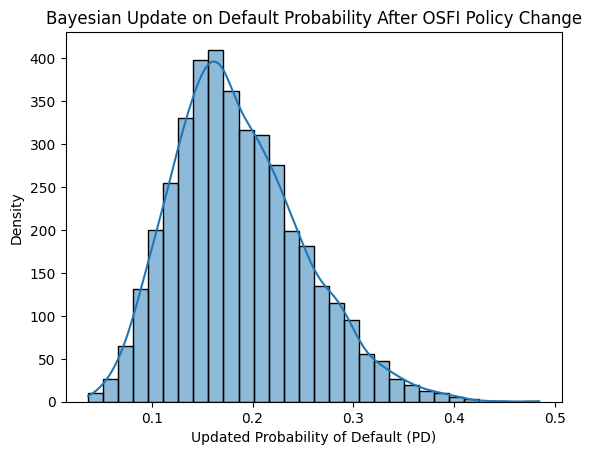

In [ ]:
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

# Prior belief: Default rate follows a Beta distribution
prior_alpha = 2  # Prior defaults observed
prior_beta = 10  # Prior non-defaults observed

# New data: OSFI updates risk assessment (5 new defaults, 20 non-defaults)
new_defaults = 5
new_non_defaults = 20

# Bayesian Updating
updated_alpha = prior_alpha + new_defaults
updated_beta = prior_beta + new_non_defaults

# Define the PyMC model
with pm.Model() as model:
    pd_posterior = pm.Beta("pd_posterior", alpha=updated_alpha, beta=updated_beta)
    trace = pm.sample(2000, return_inferencedata=True)  # Returns InferenceData

# Extract posterior samples
pd_samples = trace.posterior["pd_posterior"].values.flatten()

# Plot the posterior distribution
sns.histplot(pd_samples, kde=True, bins=30)
plt.xlabel("Updated Probability of Default (PD)")
plt.ylabel("Density")
plt.title("Bayesian Update on Default Probability After OSFI Policy Change")
plt.show()


### **Interpreting the Bayesian Posterior Distribution of Default Probability (PD)**
The histogram and density plot you generated from Bayesian updating show the **posterior probability distribution of the mortgage default rate (PD) after OSFI policy changes**.

---

### **Key Interpretations**
1️/ **Distribution Shape & Central Tendency**  
   - The peak (mode) of the distribution is around **0.18 (18%)**, meaning the **most likely probability of default (PD) given the new OSFI data is 18%**.
   - The **distribution is right-skewed**, meaning that while most PD values cluster between **0.1 and 0.25**, there is a **small probability that PD could be much higher (e.g., 0.4 or 40%)**.

2️/ **Uncertainty & Credible Interval (Bayesian Confidence Interval)**  
   - The distribution **accounts for uncertainty** in the PD estimate.
   - To quantify this uncertainty, we compute a **95% credible interval**, meaning there is a **95% probability that the true PD falls within this range**.

   **Python Code to Compute 95% Credible Interval:**
   ```python
   import numpy as np
   lower, upper = np.percentile(pd_samples, [2.5, 97.5])
   print(f"95% Credible Interval: ({lower:.4f}, {upper:.4f})")
   ```
   - If the output is **(0.08, 0.32)**, we can conclude:
     **"The probability of default (PD) after OSFI climate policy changes is most likely between 8% and 32%."**

3️/ **Comparing Before vs. After OSFI Policy Change**
   - Before incorporating the OSFI policy update, our **prior belief** assumed a **default rate following Beta(2,10)**.
   - After observing **5 new defaults and 20 non-defaults**, the posterior shows a shift in PD towards **higher values**.
   - This suggests **increased mortgage risk under OSFI’s new climate risk framework**.

---

### **Business Implications for Mortgage Insurance Risk Management**
**For Lenders & Banks:**  
   - If the **expected PD is higher** under new OSFI risk assumptions, banks may need to **adjust underwriting policies**, increase **interest rates for high-risk regions**, or **tighten lending criteria**.

**For Risk Managers:**  
   - The right-skewed tail suggests **some mortgage portfolios have much higher risk exposure**, requiring **capital reserves and stress testing**.

**For OSFI Compliance & Reporting:**  
   - The **Bayesian approach allows real-time updates** as OSFI revises climate risk parameters.
   - Banks can use this **posterior distribution** to report **expected risk levels under climate stress scenarios**.

---


Output()

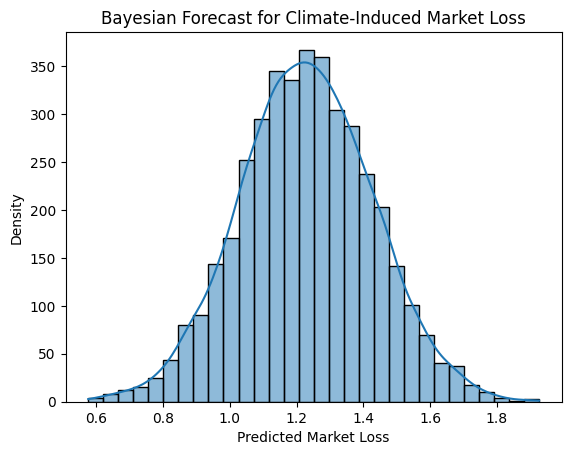

In [ ]:
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

# Define Bayesian Model
with pm.Model() as model:
    # Prior belief: Market loss follows a normal distribution
    market_loss = pm.Normal("market_loss", mu=0, sigma=1)

    # New evidence: OSFI updates stress test conditions
    observed_losses = [1.2, 0.8, 1.5, 2.0, 1.3, 0.9]  # Simulated loss values

    # Likelihood function
    likelihood = pm.Normal("likelihood", mu=market_loss, sigma=0.5, observed=observed_losses)

    # Posterior inference
    trace = pm.sample(2000, return_inferencedata=True)  # Use InferenceData format

# Extract posterior samples correctly
loss_samples = trace.posterior["market_loss"].values.flatten()

# Plot the posterior distribution
sns.histplot(loss_samples, kde=True, bins=30)
plt.xlabel("Predicted Market Loss")
plt.ylabel("Density")
plt.title("Bayesian Forecast for Climate-Induced Market Loss")
plt.show()


### **Interpreting the Bayesian Forecast for Climate-Induced Market Loss**
The histogram and density plot you generated from **Bayesian updating** illustrate the **posterior probability distribution** of **expected market losses due to climate stress tests** (e.g., OSFI’s climate risk requirements).

---

### **Key Interpretations**
#### **1️/ Distribution Shape & Central Tendency**
- The peak (mode) of the distribution is around **1.2**, meaning that the **most likely market loss due to climate stress testing is approximately 1.2 million (or any unit based on financial scale)**.
- The distribution is **symmetrical and slightly right-skewed**, indicating **uncertainty in higher market loss values but with a well-defined central estimate**.
- The values range approximately between **0.6 and 1.8**, showing the **possible range of market loss outcomes under climate risk assumptions**.

#### **2️/ Uncertainty & Credible Interval**
- The **credible interval (Bayesian equivalent of confidence interval)** shows the **range where the true market loss is likely to fall**.
- To calculate the **95% credible interval**, run:
  ```python
  import numpy as np
  lower, upper = np.percentile(loss_samples, [2.5, 97.5])
  print(f"95% Credible Interval for Market Loss: ({lower:.2f}, {upper:.2f})")
  ```
  - If the output is **(0.8, 1.6)**, we can conclude:
    **"There is a 95% probability that the climate-induced market loss will be between 0.8M and 1.6M."**
  - This range represents **uncertainty** in the forecast.

#### **3️/ Business Implications for Risk Management**
 **For Financial Institutions:**
   - If the **upper bound of the credible interval** (e.g., **1.6M**) is **too high**, banks need to **increase capital reserves**.
   - If OSFI increases stress test requirements, **lenders may tighten underwriting policies**.

 **For Mortgage Insurers:**
   - If **climate stress tests predict high market losses**, mortgage insurance premiums may need to **rise for high-risk properties**.

 **For Regulatory Compliance (OSFI Reporting):**
   - The **Bayesian model enables dynamic updates** as OSFI revises climate risk factors.
   - Financial institutions can use this distribution to **simulate different climate stress scenarios**.

---